# Сгруппируем  данные о погоде по месяцам и выделим самые холодные и теплые месяцы

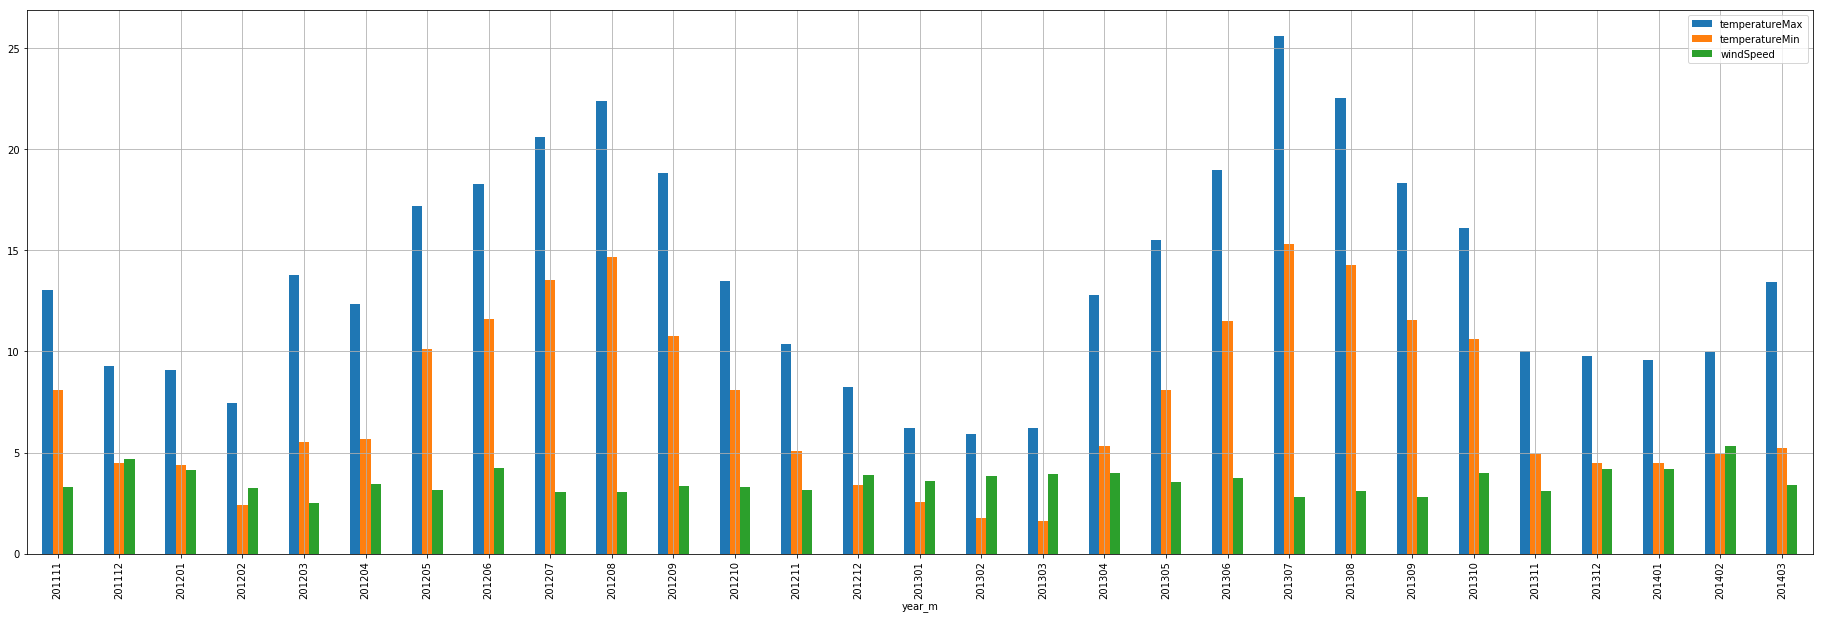

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
dataWeather=pd.read_csv("weather_daily_darksky.csv",encoding='ANSI')
def convert_to_datetime(row):
    return datetime.strptime(row['time'], '%Y-%m-%d %H:%M:%S').strftime("%Y%m")
dataWeather['year_m'] = dataWeather.apply(convert_to_datetime, axis=1)
dataWeather=dataWeather.groupby('year_m')['temperatureMax', 'temperatureMin','windSpeed'].mean()
#Построим график чтобы оценить колебания погоды в рассматриваемый период
dataWeather.plot(kind='bar',figsize=(32,10),grid=True)

    

In [3]:
#Ожидаемо на зиму приходятся самые холодные месяца на лето самые теплые 
heat_m=['201207','201208','201307','201308']
cold_m=['201202','201301','201302','201303']
#Напишем функцию которая возвращает теплый это месяц или нет 
def get_type_weather(year_m):
    if year_m in heat_m:
        return 'heat'
    if year_m in cold_m:
        return 'cold'
    return 'normal'


# Сохраним в файл полученный набор для дальнейшего использования

In [47]:
dataWeather.to_csv('dataWeather.csv')

# Построим графики по среднему энергопотреблению по всем домам

In [4]:
dataDaily=pd.read_csv("daily_dataset.csv",encoding='ANSI')
#напишем функцию для сворачивания даты в ггггмм для сворачивания статистики по месяцам 
def get_year_m(row):
    return datetime.strptime(row['day'], '%Y-%m-%d').strftime("%Y%m")
#Дополним данные месяцем и типом погоды
dataDaily['year_m'] = dataDaily.apply(get_year_m, axis=1)
dataDaily['type_w'] = dataDaily['year_m'].apply(lambda x: get_type_weather(x))
dataDaily.head()


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,year_m,type_w
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,201112,normal
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,201112,normal
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064,201112,normal
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065,201112,normal
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066,201112,normal


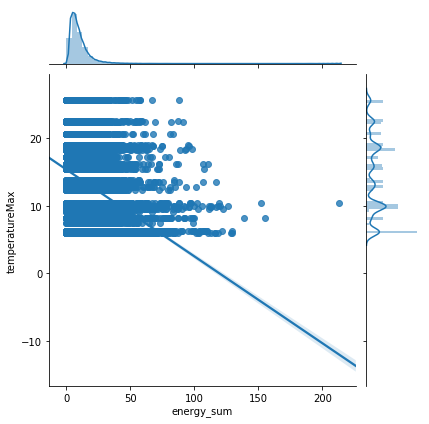

In [7]:
#сгруппируем данные по пользователям

dataGroupDaily=dataDaily.groupby(['year_m','LCLid']).mean()
dataJoin=dataGroupDaily.join(dataWeather,on='year_m')
#dataJoin[['temperatureMax','energy_sum']].plot(figsize=(42,30),grid=True , title = 'Зависиость расхода энергии от температур')
import seaborn as sns
sns.jointplot(x = 'energy_sum', y = 'temperatureMax', data = dataJoin, kind = 'reg')
#мы наблюдаем линейную зависимость потребления энергии от температуры

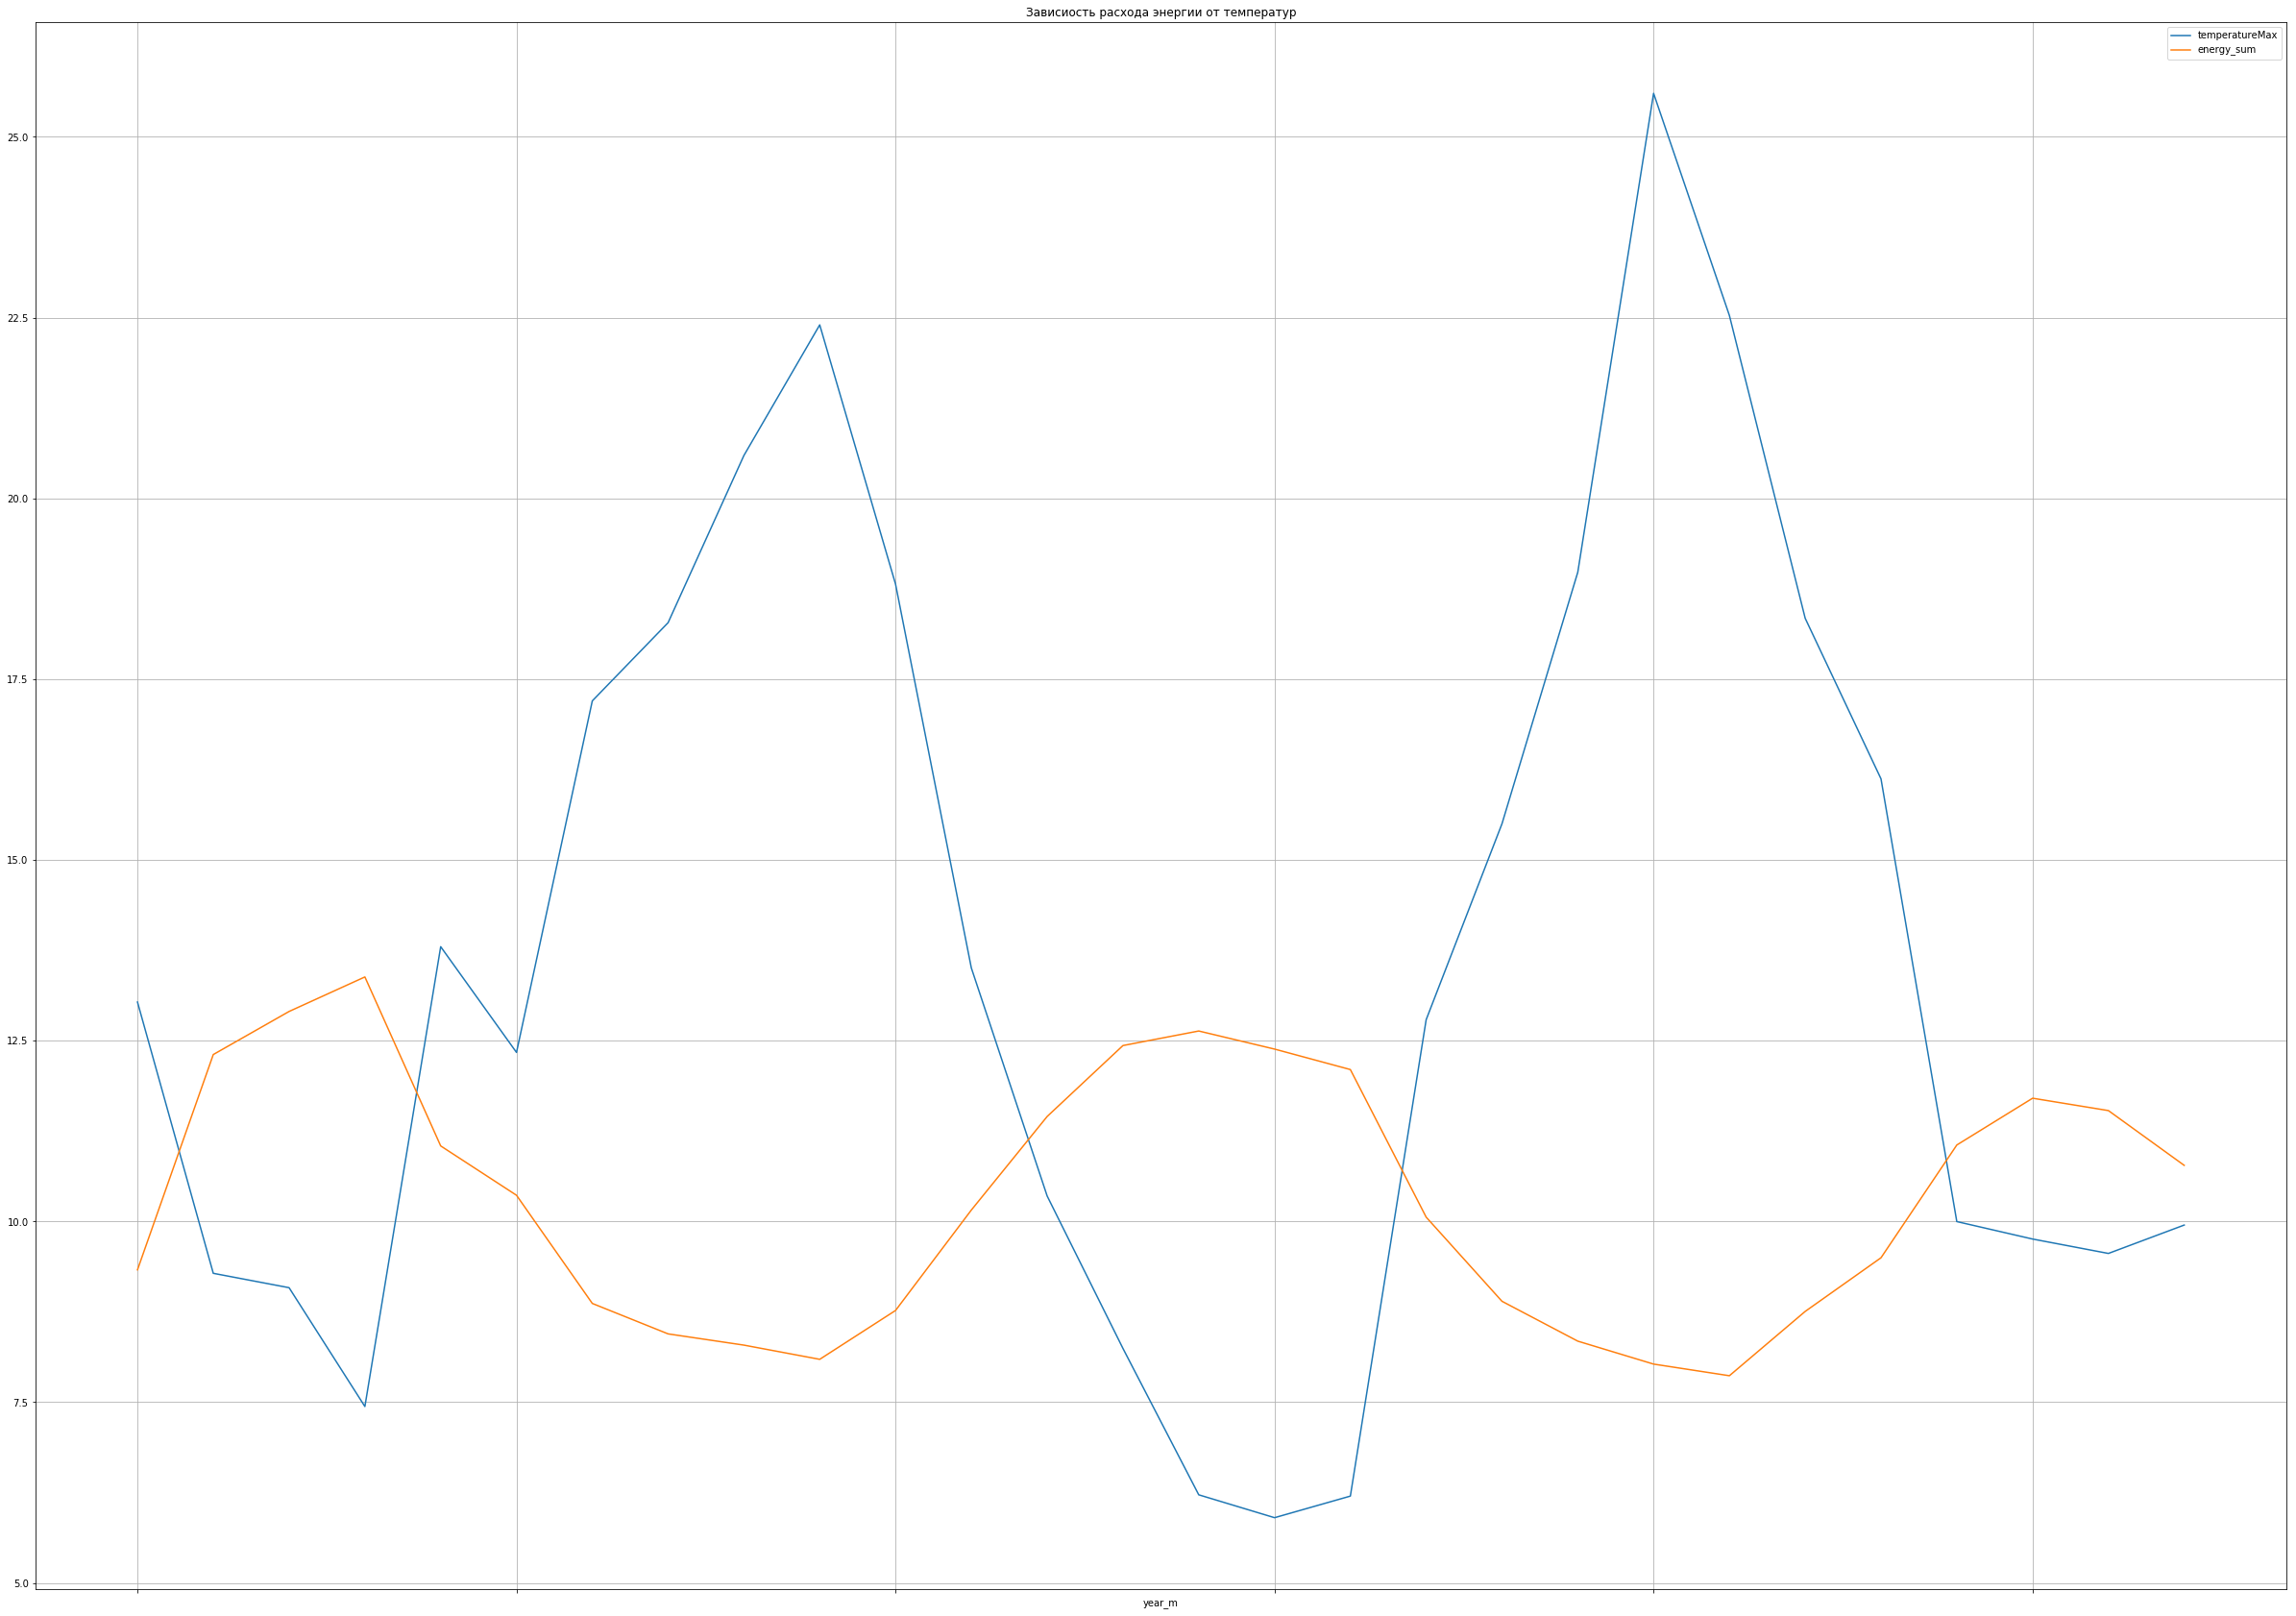

In [8]:
#сгруппируем данные по месяцам

dataGroup=dataDaily.groupby(['year_m']).mean()
dataJoinM=dataGroup.join(dataWeather,on='year_m')
dataJoinM[['temperatureMax','energy_sum']].plot(figsize=(42,30),grid=True , title = 'Зависиость расхода энергии от температур')
#Даже в жаркие месяцы не наблюдается роста потребления энергии те в данном климате кондиционеры в помещениях практически не используются


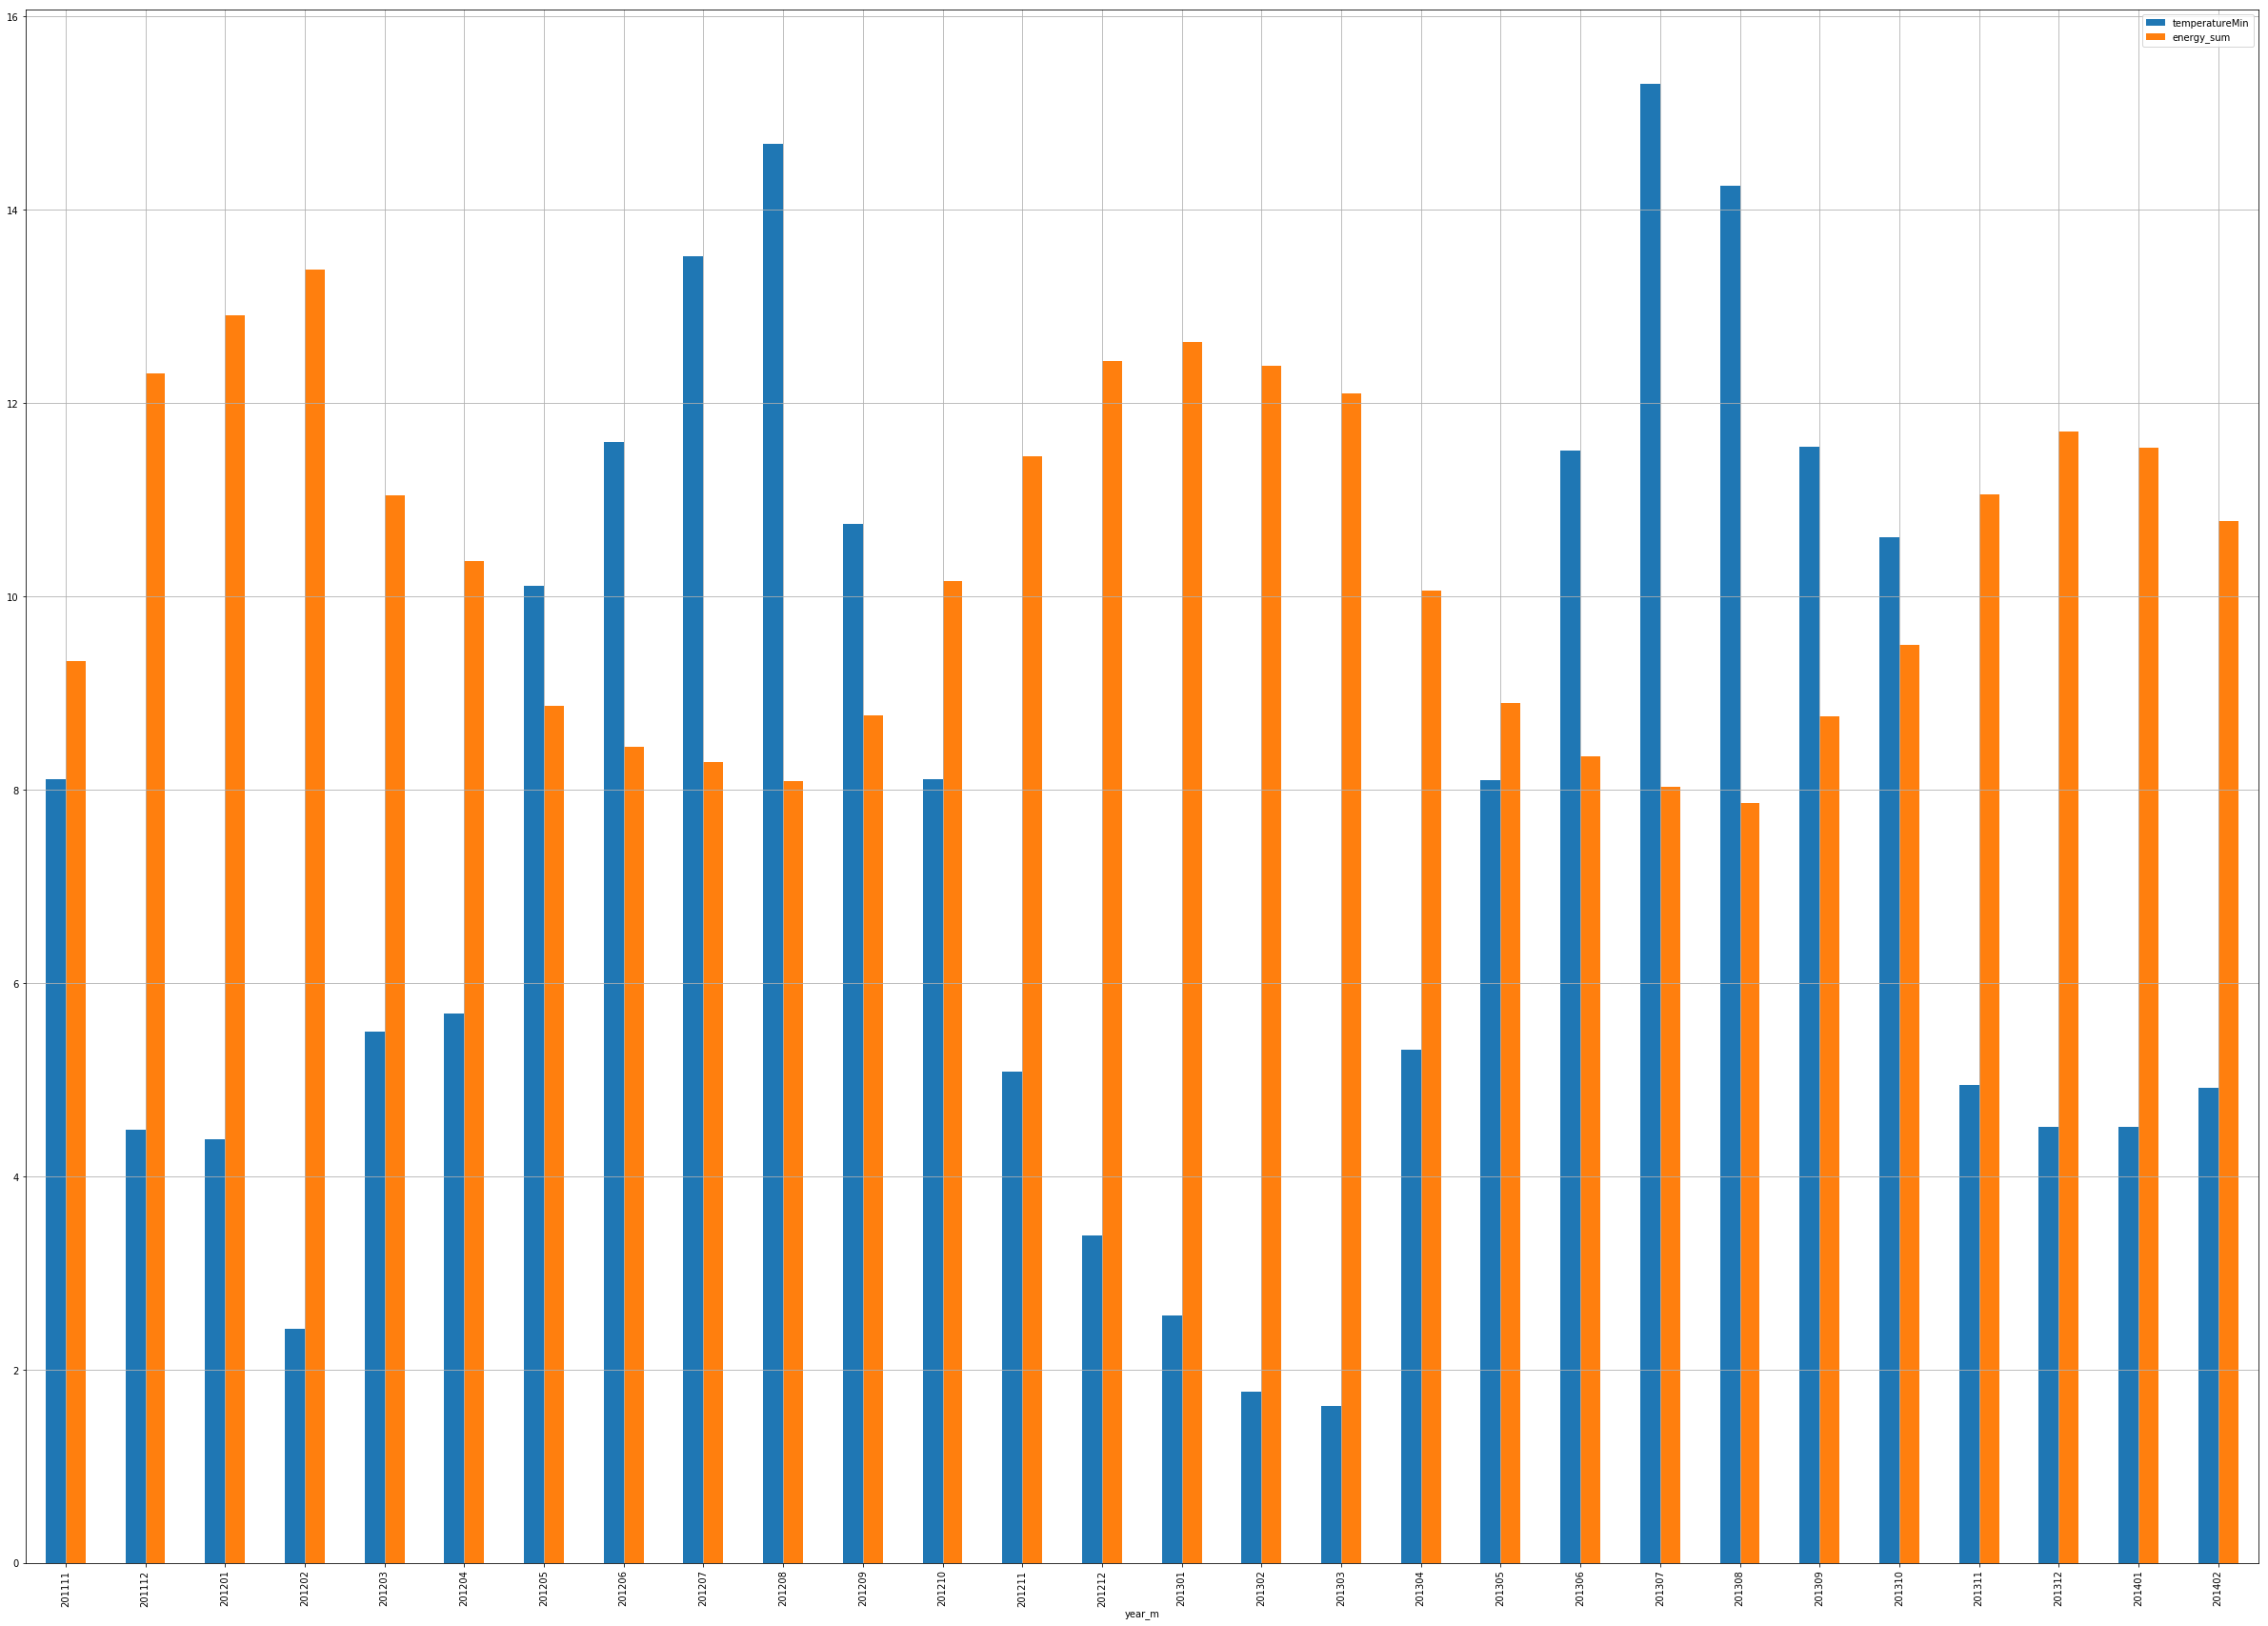

In [76]:
#Сруппируем средний часовой расход по месяцам
dataDaily=dataDaily.groupby('year_m')['energy_sum'].mean()
#Построим график 
dataDaily.plot(figsize=(32,30),grid='True')


In [ ]:
#получим часовой средний расход 
dataDaily[(dataDaily['type_w'].str.contains('normal', case=False))].head()